In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
Path.cwd()
data_path = (Path.cwd().parent / ".data").resolve()
assert data_path.exists()

In [2]:
list(f"{pth.stem}{pth.suffix}" for pth in data_path.glob("*"))

['sea_ice_n.csv',
 'co2_mlo_surface-insitu_1_ccgg_DailyData.csv',
 'rad_muc_hirsch.csv',
 'prison_population.csv',
 'co2_mlo_surface-insitu_1_ccgg_DailyData_no_meta.csv',
 'rad_muc_margareten.csv',
 'co2_spo.csv',
 'sea_ice_s.csv']

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_4496/222781903.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


<Axes: xlabel='year', ylabel='value'>

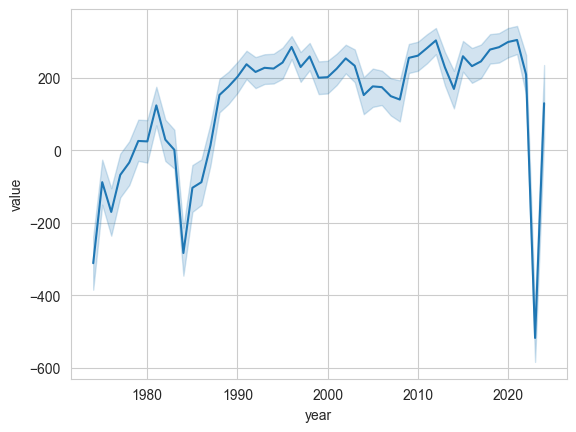

In [9]:
columns = [
    "site_code", "year", "month", "day", "hour", "minute", "second", "datetime",
    "time_decimal", "midpoint_time", "value", "value_std_dev", "nvalue",
    "latitude", "longitude", "altitude", "elevation", "intake_height", "qcflag"
]

df = pd.read_csv(
    data_path / "co2_mlo_surface-insitu_1_ccgg_DailyData.csv",
    delim_whitespace=True,
    header=None,
    skiprows=159,  # Skip the header lines
    names=columns,
)
sns.lineplot(data=df, x="year", y="value")

<Axes: xlabel='year', ylabel='value'>

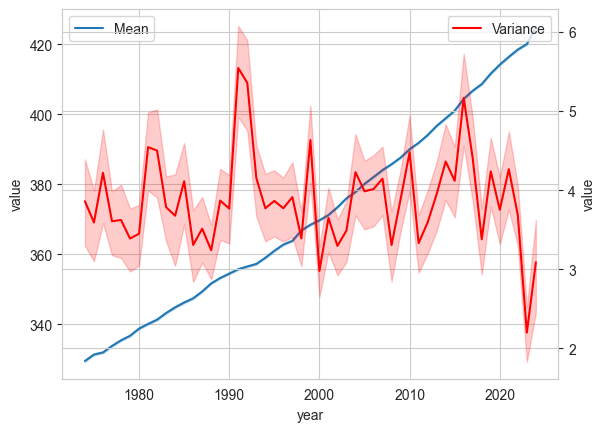

In [16]:
ax = sns.lineplot(data=df.query("value > 0"), x="year", y="value", label="Mean", estimator="mean")
sns.lineplot(data=df.query("value > 0"), x="year", y="value", ax=ax.twinx(), estimator="var", color="red", label="Variance")

In [18]:
## wrote this code for a different dataset!
# def filter_na(df: pd.DataFrame, col: str) -> pd.DataFrame:
#     num_na = df[col].isna().sum()
#     print(f"Dropped {num_na.sum()} NA values, subset: {col}")

#     return df.dropna(subset=[col])


# df = pd.read_csv(data_path / "co2_mlo_surface-insitu_1_ccgg_DailyData_no_meta.csv", sep=";")
# df = (
#     df
#     .assign(
#         date=pd.to_datetime(df[["year", "month", "day"]])
#         )
#     .assign(ice=pd.to_numeric(df['value'], errors='coerce')) # coerce: invalid parsing will be set as NaN
#     .pipe(filter_na, "value")
# )

# df.head()

In [17]:
# ax = sns.lineplot(data=df, x="year", y="ice")
# # plot var on a new y axis
# sns.lineplot(data=df, x="year", y="ice", estimator="var", ax=ax.twinx(), color="red")